In [1]:
# Note to make the corrected rate vs temperature plot
# The datasets: measured time, temperature, corrected rate, error on rate, 
# A0 (starting activity) found from exponential fit and the found error on A0.

# NB! 
# The txt files used here are all obtained/calculated in pyhton-notebook: 
# Temp3222_measurement_allData_expFit.ipynb
# So, Temp3222_measurement_allData_expFit.ipynb has to be run first!

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import matplotlib
import numpy as np
import scipy as scipy
import scipy.optimize as optimize

matplotlib.rc('font', size=16)                   # Use big fonts...
plt.rcParams['figure.figsize'] = (12.0, 10.0)    # ... and big plots

In [6]:
# Define functions we will need later

# # RMS (root mean square)
# def rms(num):
#     return np.sqrt(sum(n*n for n in num)/len(num))

# NEW for errors:
def err(arr):
    return np.sqrt(sum(n*n for n in arr))/len(arr)

# # RMSE (root-mean-square deviation (RMSD) or root-mean-square error (RMSE))
# def rmse(predictions, targets):
#     return np.sqrt((np.mean((predictions - targets) ** 2)))

# sample variance (= average value of deviations) G.F. Knoll p.69
def dev(exp_mean, meas_points):
    return np.sqrt((sum((exp_mean - meas_points) ** 2))/(len(meas_points)-1))

# Define a linear function to fit the rate vs temperature data with.
def lin_func(x, a, b):
    return b + a*x

# Chi2 fit tester:
def chi2(measured, errors_measured, fit):
    return sum(((measured-fit)**2)/(errors_measured**2))

# Beautifull recursive defaultdict so that automatically all calls that do not excist return a new empty dict
from collections import defaultdict
def recursive_defaultdict():
    return defaultdict(recursive_defaultdict)

In [7]:
# Load txt files with data-arrays of time and temperature
ti44pk0_time_T3222 = np.loadtxt("ti44pk0_time_T3222")
ti44pk0_temp_T3222 = np.loadtxt("ti44pk0_temp_T3222")

# Download arrays with:  
# the measured rate,  
# corrected rate (corrected_rate = measured_rate - exponential_fit + A0, thus corrected for exponential decay),
# the error on the rate
# and an array with the starting value rate (A0) found by the exponential fit and the error on A0
ti44pk0_rate_T3222 = np.loadtxt("ti44pk0_rate_T3222")
ti44pk0_corr_rate_T3222 = np.loadtxt('ti44pk0_corrected_rate_3222')
ti44pk0_error_rate_T3222 =  np.loadtxt('ti44pk0_error_rate_T3222')
foundA0_and_error3222 = np.loadtxt('ti44pk0_foundFitA0_and_Error_3222')

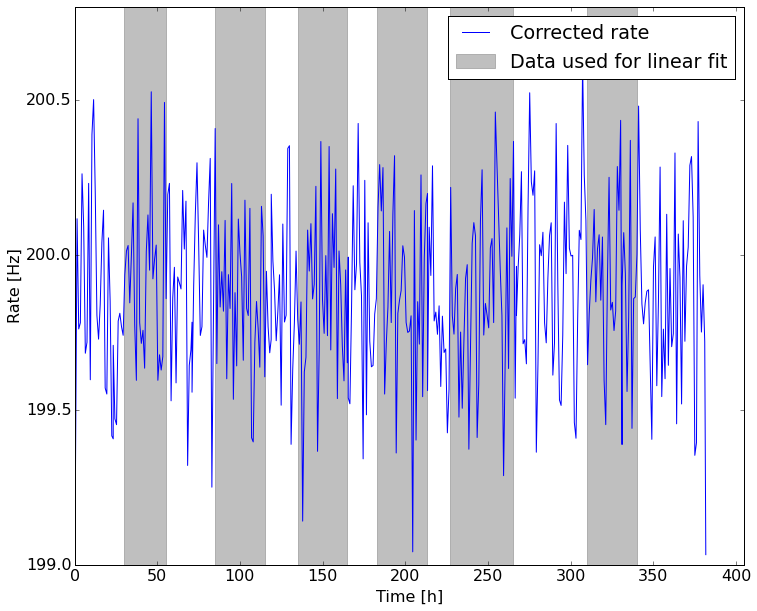

C:\Users\Dorine\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:2651: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


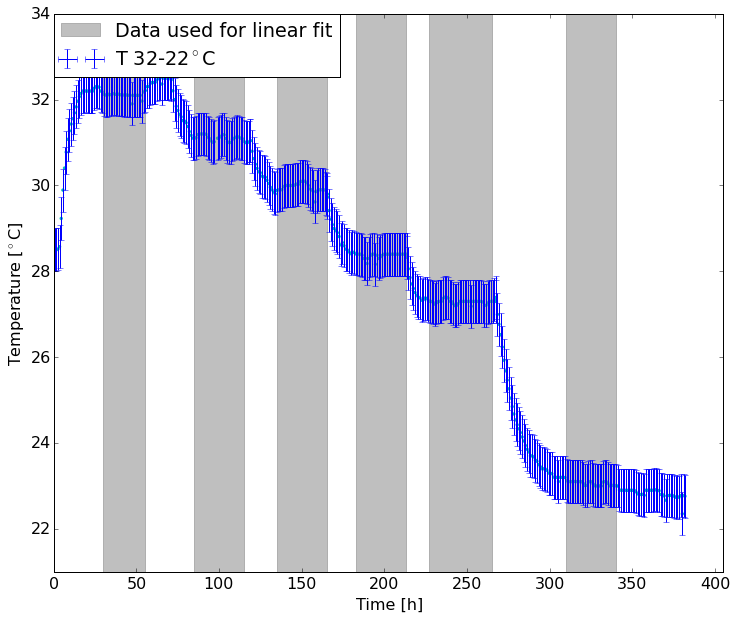

In [8]:
# Plot the two datasets used for the corrected rate vs temperature plot. 
# Show in shaded (grey) the parts of the dataset that are used for the corrected rate vs temperature plot.
# Only the shaded parts are used because the temperature was ~constant during those intervals. Giving higher statistics.

# Plot corrected rate vs time (measured rate can be added)
plt.xlabel('Time [h]')
plt.ylabel('Rate [Hz]')
plt.plot(ti44pk0_time_T3222, ti44pk0_corr_rate_T3222, label = 'Corrected rate')
plt.axvspan(30, 55, alpha=0.5, color='grey', label = 'Data used for linear fit')
plt.axvspan(85, 115, alpha=0.5, color='grey')
plt.axvspan(135, 165, alpha=0.5, color='grey')
plt.axvspan(183, 213, alpha=0.5, color='grey')
plt.axvspan(227, 265, alpha=0.5, color='grey')
plt.axvspan(310, 340, alpha=0.5, color='grey')
plt.xlim(0,405)   
plt.legend()
plt.savefig('timeVScorrRate_Ti_511keV_T3222.png', format='png', dpi=300)
plt.savefig('timeVScorrRate_Ti_511keV_T3222.pdf', format='pdf', dpi=300)
plt.show()

# Plot temperature vs time for the measurement with the temperature increasing from ~22 tot ~32C
plt.xlabel('Time [h]')
plt.ylabel('Temperature [$^{\circ}$C]')
plt.errorbar(ti44pk0_time_T3222, ti44pk0_temp_T3222, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T 32-22$^{\circ}$C')
plt.scatter(ti44pk0_time_T3222, ti44pk0_temp_T3222, color='c', marker='.', edgecolors='none', s=45)
plt.axvspan(30, 55, alpha=0.5, color='grey', label = 'Data used for linear fit')
plt.axvspan(85, 115, alpha=0.5, color='grey')
plt.axvspan(135, 165, alpha=0.5, color='grey')
plt.axvspan(183, 213, alpha=0.5, color='grey')
plt.axvspan(227, 265, alpha=0.5, color='grey')
plt.axvspan(310, 340, alpha=0.5, color='grey')
plt.xlim(0,405) 
plt.ylim(21,34)
plt.legend(loc=2, borderaxespad=0.)
# plt.savefig('timeVStemp_Ti_511keV_T3222_shaded.png', format='png', dpi=300)
# plt.savefig('timeVStemp_Ti_511keV_T3222_shaded.pdf', format='pdf', dpi=300)
plt.show()

In [9]:
# Get only the parts of the datasets with ~constant temperature. 
# The areas are chosen by eye. 

step_rate = {}
step_corr_rate = {}
step_err_rate = {}
step_temp = {}
for i in range(6):
    step_rate[i] = {}
    step_corr_rate[i] = {}
    step_err_rate[i] = {}
    step_temp[i] = {}
    
step_corr_rate[0] = ti44pk0_corr_rate_T3222[30:55]
step_corr_rate[1] = ti44pk0_corr_rate_T3222[85:115]
step_corr_rate[2] = ti44pk0_corr_rate_T3222[135:165]
step_corr_rate[3] = ti44pk0_corr_rate_T3222[183:213]
step_corr_rate[4] = ti44pk0_corr_rate_T3222[227:265]
step_corr_rate[5] = ti44pk0_corr_rate_T3222[310:340]

step_err_rate[0] = ti44pk0_error_rate_T3222[30:55]
step_err_rate[1] = ti44pk0_error_rate_T3222[85:115]
step_err_rate[2] = ti44pk0_error_rate_T3222[135:165]
step_err_rate[3] = ti44pk0_error_rate_T3222[183:213]
step_err_rate[4] = ti44pk0_error_rate_T3222[227:265]
step_err_rate[5] = ti44pk0_error_rate_T3222[310:340]

step_temp[0] = ti44pk0_temp_T3222[30:55]
step_temp[1] = ti44pk0_temp_T3222[85:115]
step_temp[2] = ti44pk0_temp_T3222[135:165]
step_temp[3] = ti44pk0_temp_T3222[183:213]
step_temp[4] = ti44pk0_temp_T3222[227:265]
step_temp[5] = ti44pk0_temp_T3222[310:340]

# Measured rate = uncorrected rate (not needed)
step_rate[0] = ti44pk0_rate_T3222[30:55]
step_rate[1] = ti44pk0_rate_T3222[85:115]
step_rate[2] = ti44pk0_rate_T3222[135:165]
step_rate[3] = ti44pk0_rate_T3222[183:213]
step_rate[4] = ti44pk0_rate_T3222[227:265]
step_rate[5] = ti44pk0_rate_T3222[310:340]

In [10]:
# HACK! There is 1 datapoint with a temperature of 116 degrees Celcius, which is not possible 
# (heater shuts down when it gets above 40 degrees and the next point is 31 degrees again, so it's weird)
# I don't know why this happens and I replaced the temp-value of this point with the one from 
# the data point before that one (so [14] and [15] are the same) so there is no hole in the data
step_temp[1][15] = step_temp[1][14]

In [11]:
# Make an array with the RMS for the corrected rate & temperatures
# Determine the RMS errors for temperature 
# Determine error of corrected rate based on the errors of the measured rate
# the error for the measured rate is the same as the error for the corrected rate

mean_temp_steps = recursive_defaultdict()
mean_corr_rate_steps = recursive_defaultdict()
error_rate_steps = recursive_defaultdict()
mean_temp_steps_array = []
mean_corr_rate_steps_array = []
error_rate_steps_array = []

# prediction_mean_temp = recursive_defaultdict()
rmse_temp_steps = recursive_defaultdict()
rmse_temp_steps_array = []

# For measured rate (not needed)
mean_rate_steps_array = []
mean_rate_steps = recursive_defaultdict()

for i in range(6):
    mean_corr_rate_steps[i] = np.mean(step_corr_rate[i])
    mean_corr_rate_steps_array.append(mean_corr_rate_steps[i])
    
    error_rate_steps[i] = err(step_err_rate[i])
    error_rate_steps_array.append(error_rate_steps[i])
    
    mean_temp_steps[i] = np.mean(step_temp[i])
    mean_temp_steps_array.append(mean_temp_steps[i])
#     prediction_mean_temp[i] = mean_temp_steps[i]*np.ones(len(step_temp[i]))
#     rmse_temp_steps[i] = rmse(prediction_mean_temp[i],step_temp[i])
    rmse_temp_steps[i] = dev(mean_temp_steps[i],step_temp[i])
    rmse_temp_steps_array.append(rmse_temp_steps[i])
    
    # For measured rate (not needed)    
    mean_rate_steps[i] = np.mean(step_rate[i])
    mean_rate_steps_array.append(mean_rate_steps[i])
    
# Make np.arrays insteas of lists
mean_temp_steps_array = np.array(mean_temp_steps_array)
mean_corr_rate_steps_array = np.array(mean_corr_rate_steps_array)
error_rate_steps_array = np.array(error_rate_steps_array)
rmse_temp_steps_array = np.array(rmse_temp_steps_array)
mean_rate_steps_array = np.array(mean_rate_steps_array)

In [12]:
# Use curve_fit to fit linear function to corrected rate
ab_guess_corr_rate = [0., mean_corr_rate_steps_array[0]]
(a_fit_corr_rate, b_fit_corr_rate), pcov_corr_rate = optimize.curve_fit(
lin_func, mean_temp_steps_array, mean_corr_rate_steps_array, ab_guess_corr_rate, error_rate_steps_array, True)
perr_corr_rate = np.sqrt(np.diag(pcov_corr_rate))

# and to measured rate (not needed)
ab_guess_rate = [0., mean_rate_steps_array[0]]
(a_fit_rate, b_fit_rate), pcov_rate = optimize.curve_fit(
lin_func, mean_temp_steps_array, mean_rate_steps_array, ab_guess_rate, error_rate_steps_array, True)
perr_rate = np.sqrt(np.diag(pcov_rate))

# Make an array for the temperature to use for the fit
temp_fit = np.linspace(min(mean_temp_steps_array), max(mean_temp_steps_array), 1000)

In [13]:
# Calculate the chi2/dof of the linear fit
chi2_corr_3222 = chi2(mean_corr_rate_steps_array, error_rate_steps_array, lin_func(mean_temp_steps_array, a_fit_corr_rate, b_fit_corr_rate))/5.
chi2_meas_3222 = chi2(mean_rate_steps_array, error_rate_steps_array, lin_func(mean_temp_steps_array, a_fit_rate, b_fit_rate))/5.

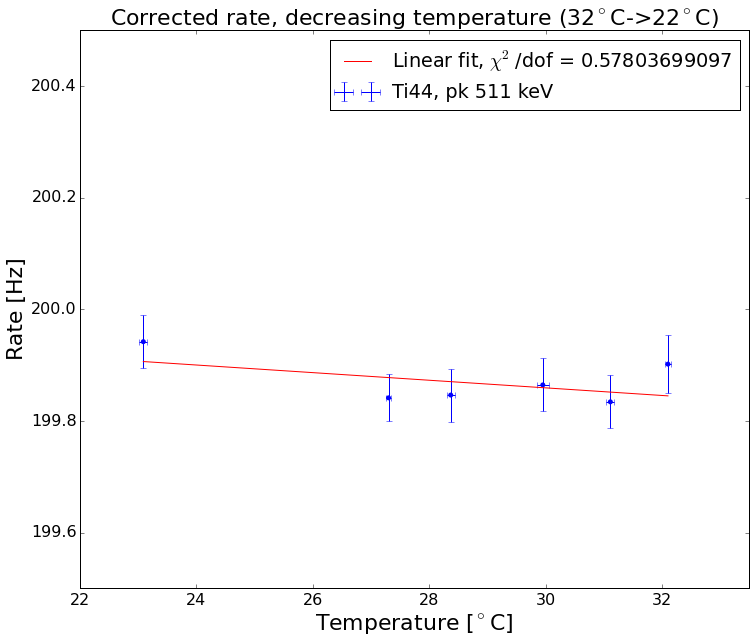

Linear fit Corrected Rate (ax+b) with a = -0.0068273311405 Hz/Degree +- 0.00668528397188, b = 200.064299769 Hz +- 0.191573308099


In [15]:
# Temp vs Rate
plt.xlabel('Temperature [$^{\circ}$C]', fontsize = 22)
plt.ylabel('Rate [Hz]', fontsize = 22)
plt.errorbar(mean_temp_steps_array, mean_corr_rate_steps_array, xerr=rmse_temp_steps_array, yerr=error_rate_steps_array,fmt=None, marker=None, label = 'Ti44, pk 511 keV')
plt.scatter(mean_temp_steps_array, mean_corr_rate_steps_array, marker='.', edgecolors='none', s=100)
plt.plot(temp_fit, lin_func(temp_fit, a_fit_corr_rate, b_fit_corr_rate), 'r-', label = ('Linear fit, ${\chi}^2$/dof = %s' % chi2_corr_3222))
plt.legend()
plt.title('Corrected rate, decreasing temperature (32$^{\circ}$C->22$^{\circ}$C)', fontsize = 22)
plt.xlim(22.,33.5)
plt.ylim(199.5,200.5)
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
#plt.savefig('tempVScorrRate_Ti_511keV_T3222_linFitPNG.png', format='png', dpi=300)
plt.savefig('tempVScorrRate_Ti_511keV_T3222_linFit.pdf', format='pdf', dpi=300)
plt.show()
print('Linear fit Corrected Rate (ax+b) with a = %s Hz/Degree +- %s, b = %s Hz +- %s' % (a_fit_corr_rate, perr_corr_rate[0], b_fit_corr_rate, perr_corr_rate[1]))

# # Plot for the measured rate 
# #(not needed, just to check and show the effect of correcting for exponential decay)
# plt.xlabel('Temperature [$^{\circ}$C]')
# plt.ylabel('Measured rate [Hz]')
# plt.errorbar(mean_temp_steps_array, mean_rate_steps_array, xerr=rmse_temp_steps_array, yerr=error_rate_steps_array, fmt=None, marker=None, label = 'Ti44, pk 511 keV')
# plt.scatter(mean_temp_steps_array, mean_rate_steps_array, marker='.', edgecolors='none', s=100)
# plt.plot(temp_fit, lin_func(temp_fit, a_fit_rate, b_fit_rate), 'r-', label = ('Linear fit, ${\chi}^2$/dof = %s' % chi2_meas_3222))
# plt.legend()
# plt.title('Measured rate')
# plt.xlim(22.,33.5)
# plt.ylim(199.5,200.5)
# plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
# plt.savefig('tempVSmeasuredRate_Ti_511keV_T3222_linFit.png', format='png', dpi=300)
# plt.savefig('tempVSmeasuredRate_Ti_511keV_T3222_linFit.pdf', format='pdf', dpi=300)
# plt.show()
# print('Linear fit Measured Rate (ax+b) with a = %s Hz/Degree +- %s, b = %s Hz +- %s' % (a_fit_rate, perr_rate[0], b_fit_rate, perr_rate[1]))

In [23]:
# calculate average rate change per degree 
av = (a_fit_corr_rate)/(b_fit_corr_rate)
max_ = (a_fit_corr_rate-perr_corr_rate[0])/(b_fit_corr_rate-perr_corr_rate[1])
min_ = (a_fit_corr_rate-perr_corr_rate[0])/(b_fit_corr_rate-perr_corr_rate[1])

print('gem: %s' %((av)*9.*100.))
print('max: %s' %(max_))
print('min: %s' %((av-min_)*9.*100))

gem: -0.030713115901
max: -6.76060978986e-05
min: 0.0301323722078


In [16]:
a_fit_corr_rate

-0.0068273311405003248

In [12]:
# Plot 3 Slow controls (pressure, humidity and temperature)

# # Time vs pres
# plt.xlabel('Time [h]')
# plt.ylabel('Pressure [Pa]')
# plt.errorbar(ti44pk0_time_Tcst, ti44pk0_pres_Tcst, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T cst')
# plt.scatter(ti44pk0_time_Tcst, ti44pk0_pres_Tcst, marker='.', edgecolors='none', s=45)
# plt.errorbar(ti44pk0_time_Tcst_2, ti44pk0_pres_Tcst_2, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T cst 2')
# plt.scatter(ti44pk0_time_Tcst_2, ti44pk0_pres_Tcst_2, marker='.', edgecolors='none', s=45)
# # plt.errorbar(ti44pk0_time_Tcst_3, ti44pk0_pres_Tcst_3, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T cst 3')
# # plt.scatter(ti44pk0_time_Tcst_3, ti44pk0_pres_Tcst_3, marker='.', edgecolors='none', s=45)
# plt.errorbar(ti44pk0_time_T22_32, ti44pk0_pres_T22_32, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T 22-32$^{\circ}$C')
# plt.scatter(ti44pk0_time_T22_32, ti44pk0_pres_T22_32, marker='.', edgecolors='none', s=45)
# plt.axvline(210, color = 'k', linewidth=1.5, label = "Data cut")
# plt.xlim(0,max(ti44pk0_time_Tcst))   
# plt.ylim(97500.,104000)
# plt.legend()
# plt.savefig('timeVSpres_Ti_511keV_TcstANDT22_32.png', format='png', dpi=300)
# plt.show()

# # Time vs humid
# plt.xlabel('Time [h]')
# plt.ylabel('Humidity [%]')
# plt.errorbar(ti44pk0_time_Tcst, np.abs(ti44pk0_humid_Tcst), xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T cst')
# plt.scatter(ti44pk0_time_Tcst, np.abs(ti44pk0_humid_Tcst), marker='.', edgecolors='none', s=45)
# plt.errorbar(ti44pk0_time_Tcst_2, np.abs(ti44pk0_humid_Tcst_2), xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T cst 2')
# plt.scatter(ti44pk0_time_Tcst_2, np.abs(ti44pk0_humid_Tcst_2), color='g', marker='.', edgecolors='none', s=45)
# # plt.errorbar(ti44pk0_time_Tcst_3, ti44pk0_humid_Tcst_3, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T cst 3')
# # plt.scatter(ti44pk0_time_Tcst_3, ti44pk0_humid_Tcst_3, color='r', marker='.', edgecolors='none', s=45)
# plt.errorbar(ti44pk0_time_T22_32, np.abs(ti44pk0_humid_T22_32), xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T 22-32$^{\circ}$C')
# plt.scatter(ti44pk0_time_T22_32, np.abs(ti44pk0_humid_T22_32), color='c', marker='.', edgecolors='none', s=45)
# plt.axvline(210, color = 'k', linewidth=1.5, label = "Data cut")
# plt.xlim(0,max(ti44pk0_time_Tcst))   
# plt.ylim(5.,20.)
# plt.legend()
# plt.savefig('timeVShumid_Ti_511keV_TcstANDT22_32.png', format='png', dpi=300)
# plt.show()    

# Time vs temp
# plt.xlabel('Time [h]')
# plt.ylabel('Temperature [$^{\circ}$C]')
# plt.errorbar(ti44pk0_time_Tcst, ti44pk0_temp_Tcst, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T cst')
# plt.scatter(ti44pk0_time_Tcst, ti44pk0_temp_Tcst, marker='.', edgecolors='none', s=45)
# plt.errorbar(ti44pk0_time_Tcst_2, ti44pk0_temp_Tcst_2, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T cst 2')
# plt.scatter(ti44pk0_time_Tcst_2, ti44pk0_temp_Tcst_2, color='g', marker='.', edgecolors='none', s=45)
# #plt.errorbar(ti44pk0_time_Tcst_3, ti44pk0_temp_Tcst_3, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T cst 3')
# #plt.scatter(ti44pk0_time_Tcst_3, ti44pk0_temp_Tcst_3, color='r', marker='.', edgecolors='none', s=45)
# plt.errorbar(ti44pk0_time_T22_32, ti44pk0_temp_T22_32, xerr=0.000001, yerr=0.5,fmt=None, marker=None, label = 'T 22-32$^{\circ}$C')
# plt.scatter(ti44pk0_time_T22_32, ti44pk0_temp_T22_32, color='c', marker='.', edgecolors='none', s=45)
# plt.axvspan(100, 120, alpha=0.5, color='grey', label = 'Data used for linear fit')
# plt.axvspan(135, 150, alpha=0.5, color='grey')
# plt.axvspan(155, 190, alpha=0.5, color='grey')
# plt.axvspan(200, 235, alpha=0.5, color='grey')
# plt.axvspan(245, 260, alpha=0.5, color='grey')
# plt.axvspan(280, 310, alpha=0.5, color='grey')
# plt.axvspan(320, 340, alpha=0.5, color='grey')
# plt.axvspan(360, 380, alpha=0.5, color='grey')
# plt.xlim(0,405) 
# plt.ylim(21,33)
# plt.legend(loc=2, borderaxespad=0.)
# plt.savefig('timeVStemp_Ti_511keV_Tcst12ANDT22_32_shaded.png', format='png', dpi=300)
# plt.savefig('timeVStemp_Ti_511keV_Tcst12ANDT22_32_shaded.pdf', format='pdf', dpi=300)
# plt.show()